In [ ]:
#***************************************************************************/
#                                                                           /
#                                                        :::      ::::::::  /
#   week3-part1.c                                      :+:      :+:    :+:  /
#                                                    +:+ +:+         +:+    /
#   By: mmarinel <mmarinel@student.42.fr>          +#+  +:+       +#+       /
#                                                +#+#+#+#+#+   +#+          /
#   Created: 2022/06/03 22:13:40 by mmarinel          #+#    #+#            /
#   Updated: 2022/06/03 22:50:17 by mmarinel         ###   ########.fr      /
#                                                                           /
#***************************************************************************/


import numpy as np
import pandas as pd

################################### debug
# pd.set_option('display.max_rows', None)
########################################

################  E01
ds_path = "/content/drive/MyDrive/Colab Notebooks/datasets/datasets/Salaries.csv"
sal_df = pd.read_csv(ds_path)
sal_df = sal_df.drop_duplicates() # just to make sure we don't have any duplicate record

############## IMPORTANT!!!
#### to fix issue found in E07, we could have filtered our dataframe like so
#sal_df = sal_df[sal_df['BasePay'] > 0][sal_df['OvertimePay'] > 0][sal_df['OtherPay'] > 0][sal_df['Benefits'] > 0]

sal_df.head()

################  E02
sal_df.info()

################  E03
sal_df['OvertimePay'].max()

################  E04
sal_df[sal_df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

################  E05

##### let's execute the following statement just to make sure 
##### that TotalPayBenefits = BasePay + OvertimePay + OtherPay + Benefits
### .....
# sal_df[sal_df['EmployeeName'] == 'JOSEPH DRISCOLL'][['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].sum(axis=1)


sal_df[sal_df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

################  E06
sal_df[sal_df['TotalPayBenefits'] == sal_df['TotalPayBenefits'].max(axis=0)]['EmployeeName']

################  E07

# running this little piece of code we note the presence of negative values...
#
# sal_df[sal_df['TotalPayBenefits'] == sal_df['TotalPayBenefits'].min(axis=0)]

# For the reason above, we now iterate over positive values only!
real_min = sal_df[sal_df['TotalPayBenefits'] >= 0]['TotalPayBenefits'].min(axis=0)
sal_df[sal_df['TotalPayBenefits'] == real_min]['EmployeeName']

################  E08
adjusted_df = sal_df[sal_df['BasePay'] >= 0]
adjusted_df.groupby('Year')['BasePay'].mean()

################  E09
job_titles_df = sal_df[sal_df['JobTitle'] != 'Not provided'].groupby('JobTitle', dropna=True)
job_titles_df.ngroups

################  E10
job_titles_df.size().sort_values(ascending=False).head()

################  E11
adjusted_df = sal_df[sal_df['Year'] == 2013]
adjusted_jobs_df = adjusted_df[adjusted_df['JobTitle'] != 'Not provided'].groupby('JobTitle', dropna=True)

adjusted_jobs_df.filter(lambda x: len(x) == 1)['JobTitle'].count()

################  E12
sal_df.groupby('JobTitle', dropna=True).filter(lambda x: 'Chief' in str(x['JobTitle']))['JobTitle'].count()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 15.9+ MB


423

In [ ]:
#***************************************************************************/
#                                                                           /
#                                                        :::      ::::::::  /
#   week3-BONUS-1.c                                    :+:      :+:    :+:  /
#                                                    +:+ +:+         +:+    /
#   By: mmarinel <mmarinel@student.42.fr>          +#+  +:+       +#+       /
#                                                +#+#+#+#+#+   +#+          /
#   Created: 2022/06/03 23:00:10 by mmarinel          #+#    #+#            /
#   Updated: 2022/06/04 00:30:21 by mmarinel         ###   ########.fr      /
#                                                                           /
#***************************************************************************/


##########  BONUS 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

################################### debug
pd.set_option('display.max_rows', None)
########################################

ds_path =  "/content/drive/MyDrive/Colab Notebooks/datasets/datasets/titles.csv"
nflx_df = pd.read_csv( "/content/drive/MyDrive/Colab Notebooks/datasets/datasets/titles.csv")
nflx_df = nflx_df.drop_duplicates()
nflx_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

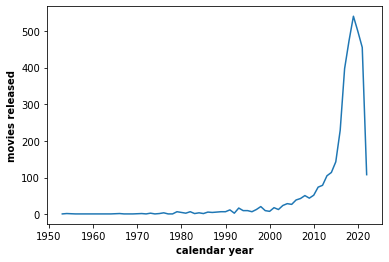

In [ ]:
###############  E01  (it seems like matplotlib.pyplot interpolates...)

##      PLEASE TAKE A LOOK AT ALTERNATIVE VERSION BELOW

plt.plot(nflx_df[nflx_df['type'] == 'MOVIE'][['type', 'release_year']].groupby('release_year', dropna=True).count())
plt.xlabel("calendar year", weight='bold')
plt.ylabel("movies released", weight='bold')

plt.show()

<BarContainer object of 5 artists>

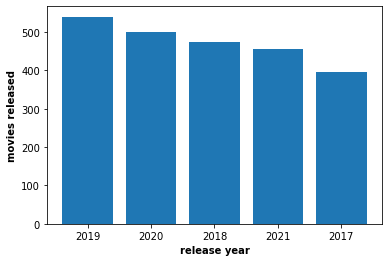

In [ ]:
###############  E01  ALTERNATIVE VERSION (Years are more distinguishable)


# taking movies from netflix dataframe along with release year                                                                       
mvs_per_year = nflx_df[nflx_df['type'] == 'MOVIE'][['type', 'release_year']]


# grouping by release year and taking number of movies produced during each year

                                  # as_index = False explained in next exercise
                                  # ....
                                  # count() ignores NaN values,
                                  # so dropna is not necessary
mvs_per_year = mvs_per_year.groupby('release_year', as_index=False, dropna=True).count()
mvs_per_year.rename(columns = {'type':'count'}, inplace=True)
mvs_per_year = mvs_per_year.sort_values('count', ascending=False).head()

# setting x axis to numeric values (.bar does not accept strings as x-values)
x_axis = np.arange(len(mvs_per_year))
y_axis = mvs_per_year['count']

# putting correct labels on x values (we kinda replaced what we did earlier)
plt.xticks(x_axis, mvs_per_year['release_year'])

plt.xlabel("release year", weight='bold')
plt.ylabel("movies released", weight='bold')

plt.bar(x_axis, y_axis)


<BarContainer object of 2 artists>

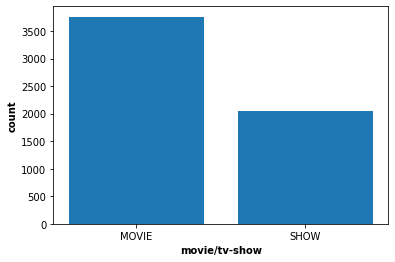

In [ ]:
###############  E02
                                  # as_index = False to avoid grouped by column
                                  # being transformed to index (!= column).
                                  
                                  # That means we would have gotten a dataframe
                                  # with only one column.
                                  # (the index is not a column and it's used to identify
                                  # rows in a dataframe)
mvs_vs_tv = nflx_df[['type', 'id']].groupby('type', dropna=True, as_index=False).count()
mvs_vs_tv.rename(columns = {'id':'count'}, inplace=True)

# setting x axis to numeric values (.bar does not accept strings as x-values)
x_axis = [0, 1]
y_axis = mvs_vs_tv['count']

# putting correct labels on x values (we kinda replaced what we did earlier)
plt.xticks(x_axis, mvs_vs_tv['type'])

plt.xlabel("movie/tv-show", weight='bold')
plt.ylabel("count", weight='bold')

plt.bar(x_axis, y_axis)


In [ ]:
###############  E03

# includes
from ast import literal_eval


<BarContainer object of 5 artists>

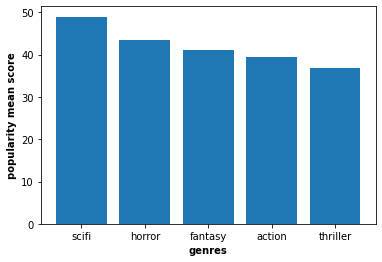

In [ ]:
# E03.01

# step1:  decomposing 'genres' column to obtain one row for each genre

                  # making a (deep) copy of the netflix dataframe
gnrs_popularity = nflx_df.copy()

gnrs_popularity['genres'] = gnrs_popularity['genres'].apply(literal_eval)
gnrs_popularity = gnrs_popularity.explode('genres')


#step2: We take the MEAN popularity score of the 5 most popular genres
gnrs_popularity = gnrs_popularity[['genres', 'tmdb_popularity']]
gnrs_popularity = gnrs_popularity.groupby('genres', dropna=True, as_index=False).mean()
gnrs_popularity = gnrs_popularity.sort_values('tmdb_popularity', ascending=False).head()


#step3: plotting as bar chart
x_axis = np.arange(len(gnrs_popularity))
y_axis = gnrs_popularity['tmdb_popularity']

plt.xticks(x_axis, gnrs_popularity['genres'])

plt.xlabel("genres", weight = 'bold')
plt.ylabel("popularity mean score", weight = 'bold')

plt.bar(x_axis, y_axis)


<BarContainer object of 5 artists>

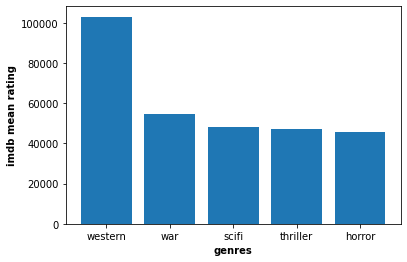

In [ ]:
# E03.02

# step1:  decomposing 'genres' column to obtain one row for each genre

                  ## making a (deep) copy of the netflix dataframe
gnrs_popularity = nflx_df.copy()

gnrs_popularity['genres'] = gnrs_popularity['genres'].apply(literal_eval)
gnrs_popularity = gnrs_popularity.explode('genres')


#step2: We take the MEAN imdb rating of the 5 most voted genres
gnrs_popularity = gnrs_popularity[['genres', 'imdb_votes']]
gnrs_popularity = gnrs_popularity.groupby('genres', dropna=True, as_index=False).mean()
gnrs_popularity = gnrs_popularity.sort_values('imdb_votes', ascending=False).head()


#step3: plotting as bar chart
x_axis = np.arange(len(gnrs_popularity))
y_axis = gnrs_popularity['imdb_votes']

plt.xticks(x_axis, gnrs_popularity['genres'])

plt.xlabel("genres", weight = 'bold')
plt.ylabel("imdb mean rating", weight = 'bold')

plt.bar(x_axis, y_axis)


<BarContainer object of 5 artists>

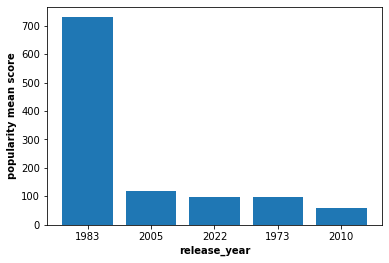

In [ ]:
################  E04

# step1:  decomposing 'production countries' column to obtain one row for each production country
from ast import literal_eval

                  # making a (deep) copy of the netflix dataframe
gnrs_popularity = nflx_df.copy()

gnrs_popularity['production_countries'] = gnrs_popularity['production_countries'].apply(literal_eval)
gnrs_popularity = gnrs_popularity.explode('production_countries')


#step2: 
#       2.1.  For each year, we take the MEAN popularity score of the movies that were 
#             produced during that year
#
#       2.2.  We then take the first 5 years with the highest MEAN popularity score

# grepping US movies
gnrs_popularity = gnrs_popularity[gnrs_popularity['production_countries'] == 'US']

# taking the first 5 years with the highest MEAN popularity score
gnrs_popularity = gnrs_popularity[['release_year', 'tmdb_popularity']]
gnrs_popularity = gnrs_popularity.groupby('release_year', dropna=True, as_index=False).mean()
gnrs_popularity = gnrs_popularity.sort_values('tmdb_popularity', ascending=False).head()

#step3: plotting as bar chart
x_axis = np.arange(len(gnrs_popularity))
y_axis = gnrs_popularity['tmdb_popularity']

plt.xticks(x_axis, gnrs_popularity['release_year'])

plt.xlabel("release_year", weight = 'bold')
plt.ylabel("popularity mean score", weight = 'bold')

plt.bar(x_axis, y_axis)
